In [1]:
# # basic import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y = make_blobs(100,2,centers=2,random_state=0,cluster_std =1.5)

In [4]:
X

array([[ 5.30012145,  2.90245558],
       [ 0.33406454,  0.24093359],
       [-0.90292296,  5.47002286],
       [-0.35540854,  1.33259263],
       [ 3.83731221,  1.37307758],
       [ 1.67476374,  1.9994218 ],
       [ 1.04490785,  4.02301155],
       [ 4.93968056,  3.11843585],
       [ 0.39527985,  3.8503332 ],
       [ 0.85015303, -0.13666101],
       [ 0.45440185,  4.53831078],
       [ 1.50149476,  0.53859489],
       [ 1.28868255,  5.76874588],
       [-0.38467747,  4.38170542],
       [ 1.65326247,  2.10134825],
       [ 5.62998468,  2.31438289],
       [ 3.7452214 , -0.7222336 ],
       [-0.03242059,  3.76445759],
       [ 0.08140641,  0.20528675],
       [ 0.90039341,  1.70653745],
       [ 1.20869122,  4.87103111],
       [ 0.50894128,  4.38803534],
       [ 0.94592303,  3.21218555],
       [-0.77145468,  5.65502706],
       [ 2.84018251,  0.64034416],
       [ 0.8214418 ,  4.91968508],
       [ 0.93813529, -0.34199415],
       [ 0.99202011,  6.98259307],
       [ 1.64206493,

In [5]:
X.shape

(100, 2)

In [6]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [7]:
y.shape

(100,)

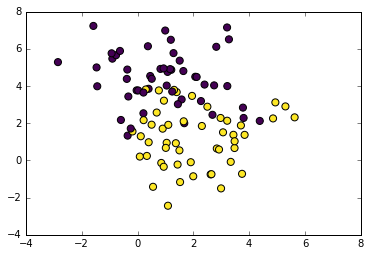

In [8]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',s=50)

In [9]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X,y)
clf.predict([[12,120]])


array([1])

# Binary classifiaction

In [11]:
df = sns.load_dataset('iris')

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


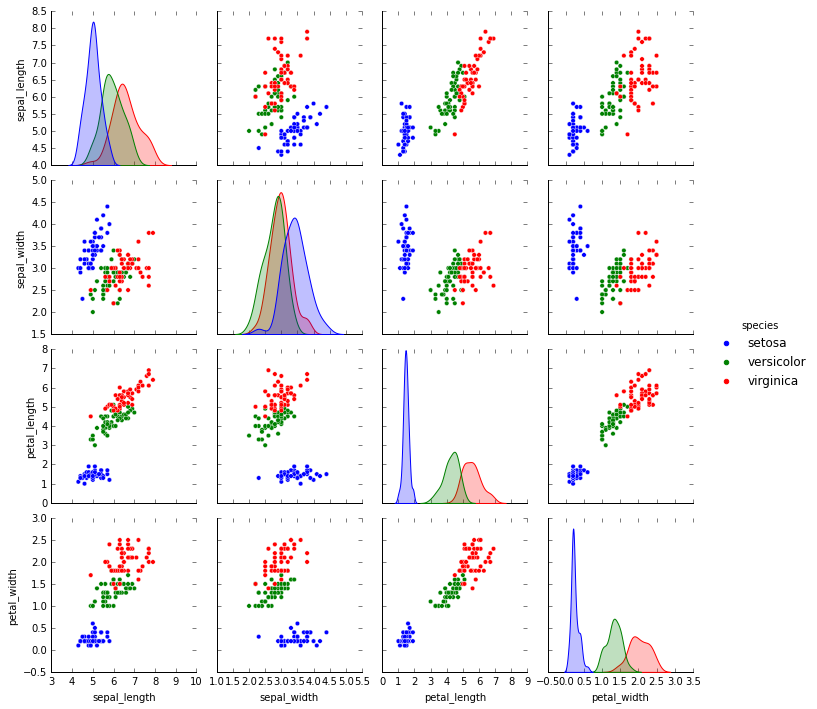

In [13]:
sns.pairplot(df,hue='species')

In [14]:
df.shape

(150, 5)

In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:

df.duplicated().sum()

1

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [ ]:
#df.describe()

In [19]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [20]:
df['species'] = df['species'].map({'setosa':1,
                                 'versicolor':2,
                                 'virginica':3
                                })

In [21]:
df1 = df[df['species']!=2]

In [22]:
df1['species'].unique()

array([1, 3], dtype=int64)

In [23]:
#df1.head()

In [24]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [25]:
X .shape,y.shape

((100, 4), (100,))

In [26]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

# feature scalling not required

In [28]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict (X_test)

In [29]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Model: {clf.__class__.__name__}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(classification_report(y_test, test_pred))


Model: GaussianNB
Train Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<AxesSubplot: >

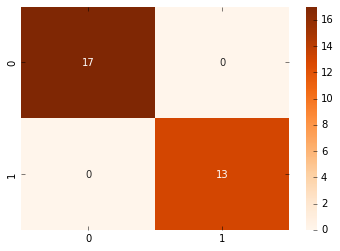

In [30]:
sns.heatmap(confusion_matrix(y_test, test_pred),annot=True,cmap='Oranges')

# Multiclass  classifiaction

In [31]:
# # basic import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = sns.load_dataset('iris')

In [33]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [34]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [35]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [36]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict (X_test)

In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Model: {clf.__class__.__name__}")
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(classification_report(y_test, test_pred))

Model: MultinomialNB
Train Accuracy: 0.9523809523809523
Test Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.92      0.92      0.92        13
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



<AxesSubplot: >

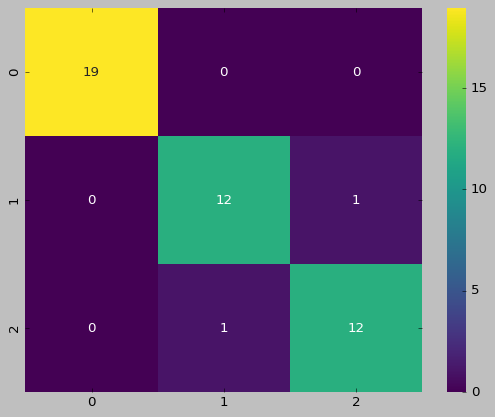

In [39]:
sns.heatmap(confusion_matrix(y_test, test_pred),annot=True,cmap='viridis')